<a href="https://colab.research.google.com/github/rfps09/Monitoria/blob/main/SemanaAcademica/SemanaAcademicaIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rede neural para classificação de iris

Carregando e separando os dados, em 80% para treino e 20% para teste, 10% dos 80% vão para validação

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/iris.data', delimiter=',')
data = np.delete(data,-1,axis=1)
classe = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/iris.data', delimiter=',', dtype=str,usecols=-1)
classe = np.unique(classe,return_inverse=1)[1]

data_treino, data_teste, classe_treino, classe_teste = train_test_split(data,classe,test_size=0.2, random_state=123, stratify=classe)

classe_treino_onehot = to_categorical(classe_treino)

Criando a rede neural

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(numInput,numClasses):
  model = Sequential()
  model.add(Dense(20,activation='tanh', input_dim=numInput))
  model.add(Dense(numClasses,activation='softmax'))
  model.compile('Adam','categorical_crossentropy', metrics=['categorical_accuracy'])

  return model

model = create_model(4,3)

history = model.fit(data_treino,classe_treino_onehot,epochs=500, validation_split=0.1)

Epoch 1/500
4/4 [==============================] - 3s 62ms/step - loss: 1.1364 - categorical_accuracy: 0.3519 - val_loss: 1.0228 - val_categorical_accuracy: 0.3333
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 1.0879 - categorical_accuracy: 0.3611 - val_loss: 0.9965 - val_categorical_accuracy: 0.4167
Epoch 3/500
4/4 [==============================] - 0s 8ms/step - loss: 1.0467 - categorical_accuracy: 0.3889 - val_loss: 0.9762 - val_categorical_accuracy: 0.6667
Epoch 4/500
4/4 [==============================] - 0s 8ms/step - loss: 1.0103 - categorical_accuracy: 0.5370 - val_loss: 0.9604 - val_categorical_accuracy: 0.6667
Epoch 5/500
4/4 [==============================] - 0s 8ms/step - loss: 0.9785 - categorical_accuracy: 0.6759 - val_loss: 0.9467 - val_categorical_accuracy: 0.5833
Epoch 6/500
4/4 [==============================] - 0s 8ms/step - loss: 0.9558 - categorical_accuracy: 0.6667 - val_loss: 0.9351 - val_categorical_accuracy: 0.5833
Epoch 7/500
4/4 [====

Modelo da rede neural

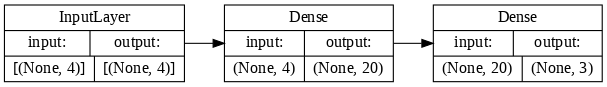

In [3]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True,show_layer_names=False,rankdir="LR",dpi=80)

Gráficos

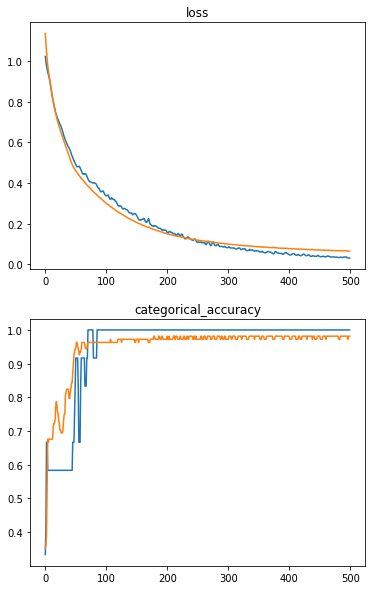

In [4]:
import matplotlib.pyplot as plt

def plot_metrics(map):
    val_data = True if 'val_loss' in map.history.keys() else False
        
    tam = len(map.history.keys())
    if val_data:
        tam = int(tam/2)

    fig,axes = plt.subplots(tam,1,figsize=(6,tam*5))

    count = 0
    for key in map.history.keys():
        if key.startswith('val_'):
            continue
        if val_data:
            axes[count].plot(map.history['val_'+key])
        axes[count].plot(map.history[key])
        axes[count].set_title(key)
        count+=1

plot_metrics(history)

Testando a rede neural

In [5]:
classe_predita_onehot = model.predict(data_teste)
classe_predita = classe_predita_onehot.argmax(axis=1)

1/1 [==============================] - 0s 66ms/step


Matriz de confusão

In [8]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(classe_teste, classe_predita)
print(matriz_confusao)

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


Métricas

In [10]:
from sklearn.metrics import classification_report

print(classification_report(classe_teste, classe_predita, digits=5,zero_division=1))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        10
           1    1.00000   0.90000   0.94737        10
           2    0.90909   1.00000   0.95238        10

    accuracy                        0.96667        30
   macro avg    0.96970   0.96667   0.96658        30
weighted avg    0.96970   0.96667   0.96658        30

